In [1]:
import torch
import easyocr
import cv2
import numpy as np
from matplotlib import pyplot as plt

torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 4060 Laptop GPU'

In [2]:
IMAGE_PATH = (r"C:\Users\aidan\OneDrive\Desktop\Robotics\easyocr\images\125_16.webp")

In [3]:
reader = easyocr.Reader(['en'], gpu=True)
result = reader.readtext(IMAGE_PATH)
result

[([[53, 0], [451, 0], [451, 79], [53, 79]], 'UILoULIVU', 0.07314313628695404),
 ([[163, 91], [249, 91], [249, 107], [163, 107]],
  'phfsehtco6I',
  0.01589117092193163),
 ([[251, 77], [345, 77], [345, 121], [251, 121]], 'JMS', 0.5115301730524865),
 ([[781, 289], [849, 289], [849, 393], [781, 393]], '37', 0.5746449744874164),
 ([[525, 764], [707, 764], [707, 827], [525, 827]],
  'SONOS',
  0.6545757626920857),
 ([[744, 784], [989, 784], [989, 840], [744, 840]],
  'Medtronic RIKE',
  0.8088955253844629),
 ([[758, 818], [966, 818], [966, 945], [758, 945]], '125', 0.9999956639937885),
 ([[187.8753549101061, 744.0422203044109],
   [425.28988816828024, 783.439397393102],
   [399.12464508989393, 906.9577796955891],
   [161.71011183171976, 867.560602606898]],
  '125',
  0.9996981373940511)]

discarding: UILoULIVU
discarding: phfsehtco6I
discarding: JMS
discarding: SONOS
discarding: Medtronic RIKE


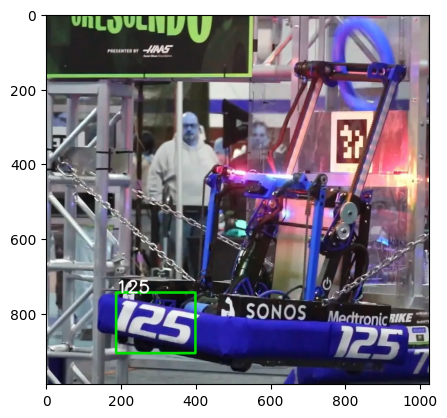

In [43]:
bottom_right_list = list()
top_left_list = list()
index_list = list()
answer_list = list()

if not result:
    print("Empty Results List")

else:
    for index, item in enumerate(result):
        if result[index][1].isdigit():
            bottom_right_list.append(tuple(result[index][0][2]))
            top_left_list.append(tuple(result[index][0][0]))
            answer_list.append(result[index][1])
        else:
            print(f"discarding: {result[index][1]}")

index_view = 2
font = cv2.FONT_HERSHEY_SIMPLEX

img = cv2.imread(IMAGE_PATH)
img = cv2.rectangle(img, tuple(map(int, top_left_list[index_view])), tuple(map(int, bottom_right_list[index_view])), (0, 225, 0), 5)
img = cv2.putText(img, answer_list[index_view], tuple(map(int, top_left_list[index_view])), font, 1.5, (255, 255, 255), 3)
plt.imshow(img)
plt.show()

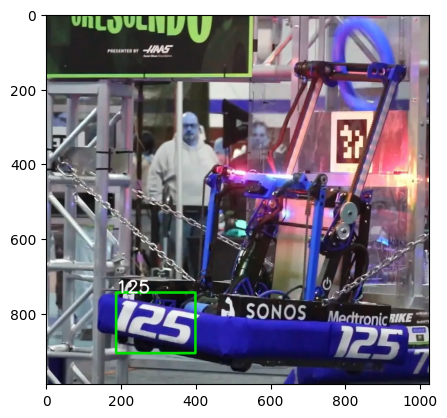

In [40]:
map(int, top_left_list[2])

In [34]:
top_left_list[1]

(758, 818)